**420-A58-SF - Algorithmes d'apprentissage non supervisé - Hiver 2023 - Spécialisation technique en Intelligence Artificielle**<br/>
MIT License - Copyright (c) 2023 Mikaël Swawola
<br/>
![Travaux Pratiques - DBSCAN (implémentation / scikit-learn)](static/01-04-banner.png)
<br/>
**Objectif:** cet atelier a pour objectif l'implémentation en Python de l'algorithme DBSCAN, ainsi que sa mise en oeuvre avec la libraire scikit-learn

In [20]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [21]:
import queue
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from helpers import generate_toy_dataset

## 1 - Génération et visualisation des données

Nous allons tout d'abord générer un jeu de données d'école permettant une bonne illustration des forces de l'algorithme DBSCAN

**Exercice 1-1 - Consultez la fonction `generate_toy_dataset` et exécutez le code ci-dessous**

Text(0, 0.5, 'x1')

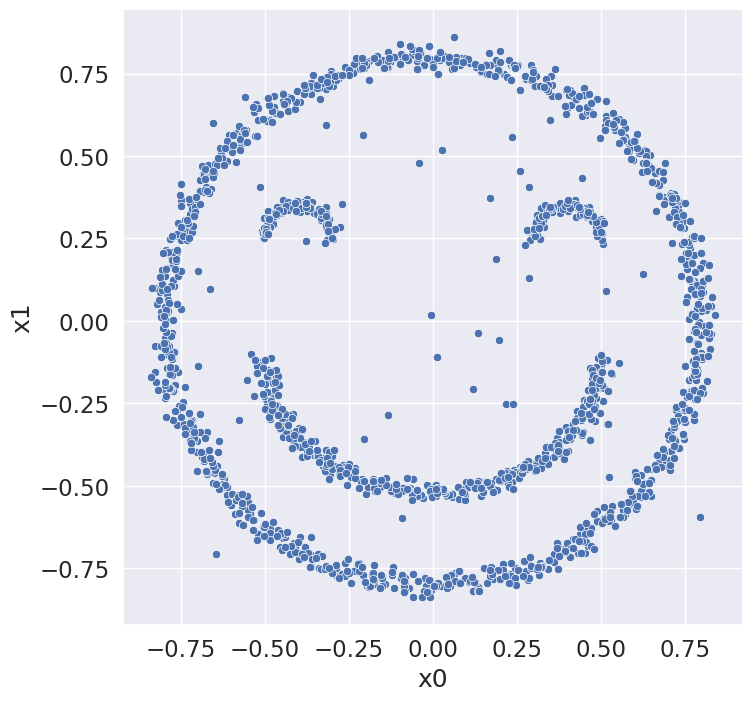

In [22]:
X = generate_toy_dataset(seed=2021)


In [ ]:

# Configuration de la visualisation
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.figsize']=(8,8)
_ = sns.scatterplot(x=X[:,0], y=X[:,1])
plt.xlabel('x0')
plt.ylabel('x1')

## 2 - Implémentation de l'algorithme DBSCAN

Nous allons maintenant implémenter l'algorithme DBSCAN. Cette implémention sera réalisée en différentes étapes.

**Exercice 2-1 - Compléter la fonction `eps_voisinage` permettant de trouver tous les points de l'epsilon-voisinage. Afin de vérifier la bonne implémentation, exécutez le test**

<details>
<summary>
    <font size="3" color="darkgreen"><b>Cliquer ici pour obtenir un indice</b></font>
</summary>
<p>
Ne pas oublier que le point requête est inclus dans le voisinage !
</p>

In [4]:
def eps_voisinage(data, pt, eps):
    """
    Arguments:
    data - les données
    pt   - le point requête pour lequel on recherche le voisinage
    eps  - le rayon maximum du voisinage
    """
    points = []
    for i in range(len(data)):
        if np.linalg.norm(data[i] - data[pt]) <=eps:
            points.append(i)
    return points
    # Compléter ~ 5 lignes de code

In [5]:
# Test de la fonction eps_voisinage
assert eps_voisinage(X, 1587, 0.1) == [1587, 1624]

**Exercice 2-2 - Compléter la fonction `dbscan`**

In [6]:
def dbscan(data, eps, MinPts):
    """
    Arguments:
    data   - les données
    eps    - le rayon maximum du voisinage
    MinPts - le nombre minimum de points dans un eps-voisinage d'un point donné
    """
    
    # Initialiser un tableau c destiné à contenir le type chaque points. Les indices utilisés seront les suivants:
    # 0: point non assigné
    # -1: point central
    # -2: point frontière
    ############## Compléter ici ~ 1 ligne de code ##############
    c = np.zeros(shape=(data.shape[0], 1))
    voisinages = []      # Liste des voisinages (liste) de tous les points
    pt_centraux = []     # Liste des points centraux
    pt_non_centraux = [] # Liste des points non centraux (frontières et aberrants)
    
    # Calculer les voisinages de tous les points
    ############## Compléter ici ~ 2 lignes de code ##############
    for i in range (len(data)):
        voisinages.append(eps_voisinage(data, i, MinPts))
    # Trouver tous les points centraux, frontières et aberrants
    ############## Compléter ici ~ 11 lignes de code ##############
    for i in range(len(voisinages)):
        # dense ou pas
        if(len(voisinages[i]) >= MinPts):             
            c[i] = -1 # -1 ou point central
            pt_centraux.append(i)
        else:
            pt_non_centraux.append(i)
    
    # Parmi les points non centraux, ils peuvent être frontière ou aberrant
    for pt in range(len(pt_non_centraux)):
        for j in voisinages[pt]:
            if (j in pt_centraux):
                c[pt] = -2 # frontière
                break

            
    #Assignation des points aux clusters
    cluster = 1
    for i in range(len(c)):
        q = queue.Queue()
        if (c[i] == -1): # point central
            c[i] = cluster
            for x in voisinages[i]:
                if(c[x] == -1): # point central
                    q.put(x)
                    c[x] = cluster
                elif(c[x] == -2): # point frontière
                    c[x] = cluster
    
            while not q.empty():
                neighbors = voisinages[q.get()]
                for y in neighbors:
                    if (c[y] == -1): # point central
                        c[y] = cluster
                        q.put(y)
                    if (c[y] == -2): # point frontière
                        c[y] = cluster
            cluster = cluster + 1 
           
    return c, cluster

Exécuter le code ci-dessous pour vérifier la bonne implémentation de l'algorithme

Nombre de clusters: 1


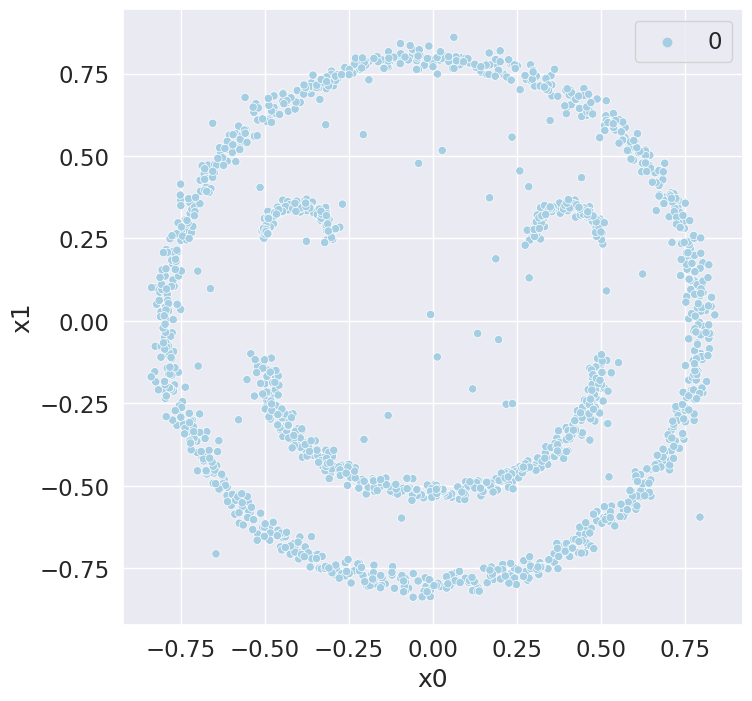

In [9]:
eps = 0.005
minpts = 2

c, cluster = dbscan(X, eps = eps, MinPts = minpts)

_ = sns.scatterplot(x=X[:,0], y=X[:,1], hue=(c.ravel()-1).astype(int), palette="Paired")
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend(loc='upper right')

print('Nombre de clusters: ' + str(cluster - 1))

**Exercice 2-3 - À l'aide d'une recherche sur grille, estimer les meilleures valeurs de `eps` et `min_pts`**

In [ ]:
# Compléter cette cellule ~ 10-12 lignes de code

## 3 - Mise en oeuvre de DBSCAN avec scikit-learn

**Exercice 3-1 - À l'aide de scikit-learn, effectuer le partitionnement DBSCAN. Choisissez adéquatement les valeurs des paramètres eps et min_samples. L'algorithme est-il en mesure de trouver l'ensemble des clusters et d'identifier les observations aberrantes ?**

[class sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

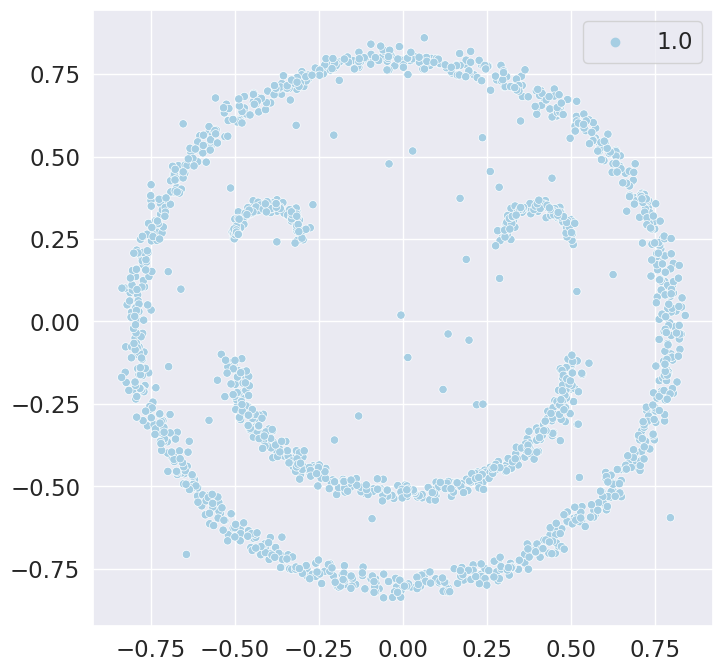

In [64]:
## Gabarito
for eps in [0.05]: #[0.05, 0.1, 0.15]:
    for minpts in [2]: #[2, 4, 6]:
        c, cluster = dbscan(X, eps, minpts)
        _ = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=c.squeeze(), palette="Paired")
        plt.show()


/*********************/

In [12]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [73]:
def do_visualization(pDf, pHue):    
    _ = sns.scatterplot(x=pDf[:, 0], y=pDf[:, 1], hue=pHue , palette="Paired")
    plt.show()
    #plt.scatter(pDf[:, 0], pDf[:, 1])
    #plt.show()

In [74]:
def do_dbscan(pDf, pEps=0.5, pMinSamples=10):
    db = DBSCAN(eps=pEps, min_samples=pMinSamples).fit(X)
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)

    do_visualization(pDf, labels)

    #print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
    #print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
    #print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
    #print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
    #print(
    #"Adjusted Mutual Information:"
    #f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
    #)
    #print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Estimated number of clusters: 4
Estimated number of noise points: 27


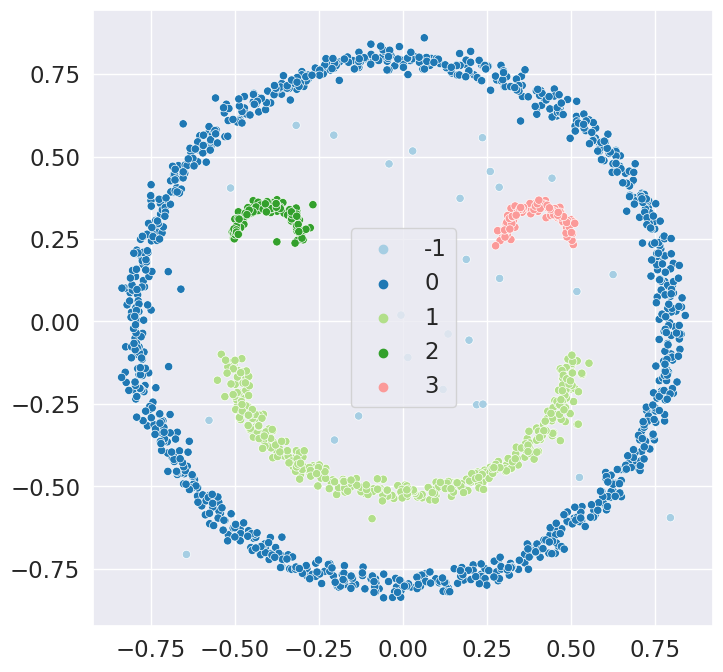

In [75]:
# Compléter cette cellule ~ 4-5 lignes de code
X = generate_toy_dataset(seed=2021)
do_dbscan(X, 0.07, 4)
#do_visualization(X, hue)

In [19]:
print(set(labels))

{0}


In [27]:

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 0


In [58]:
def do_visualization(pDf):
    plt.scatter(pDf[:, 0], pDf[:, 1])
    plt.show()

In [41]:
def do_dbscan(pDf, pEps=0.5, pMinSamples=10):
    db = DBSCAN(eps=pEps, min_samples=pMinSamples).fit(X)
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)

    #print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
    #print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
    #print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
    #print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
    #print(
    #"Adjusted Mutual Information:"
    #f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
    #)
    #print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

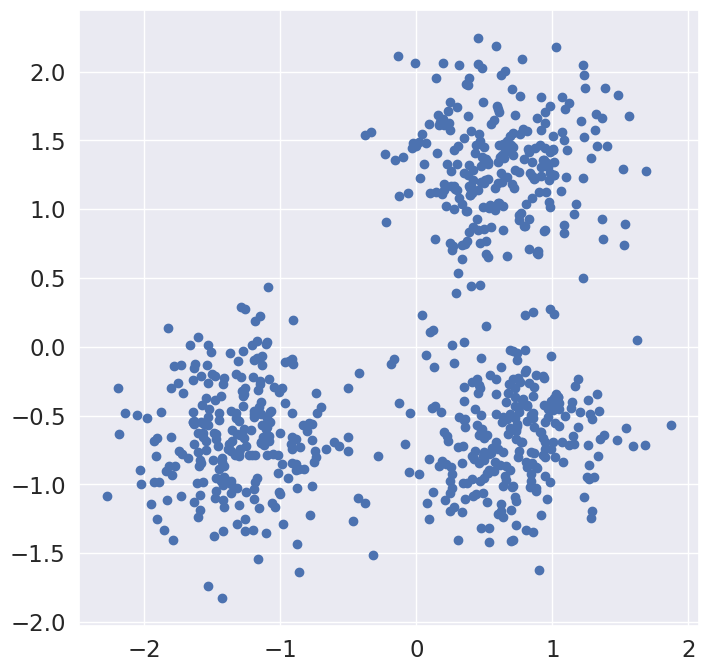

In [31]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
centers = [[1, 1], [-1, -1], [1, -1]]
df, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

df = StandardScaler().fit_transform(df)

import matplotlib.pyplot as plt

plt.scatter(df[:, 0], df[:, 1])
plt.show()

In [44]:
do_dbscan(df, 0.05, 3)

Estimated number of clusters: 55
Estimated number of noise points: 202


**Fin de l'atelier 01-04**

In [35]:
## https://machinelearningknowledge.ai/tutorial-for-dbscan-clustering-in-python-sklearn/
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [68]:
X, y = make_moons(n_samples=500, noise=0.1)
df=pd.DataFrame(X,y)
df=df.rename(columns={0: "X1", 1:"X2"})
df.head()

,X1,X2
1,0.804283,-0.674975
1,1.637345,-0.123418
1,1.726518,-0.035276
0,-0.524081,0.539103
0,0.903736,0.209706


ValueError: All arrays must be of the same length

Text(0, 0.5, '$x_2$')

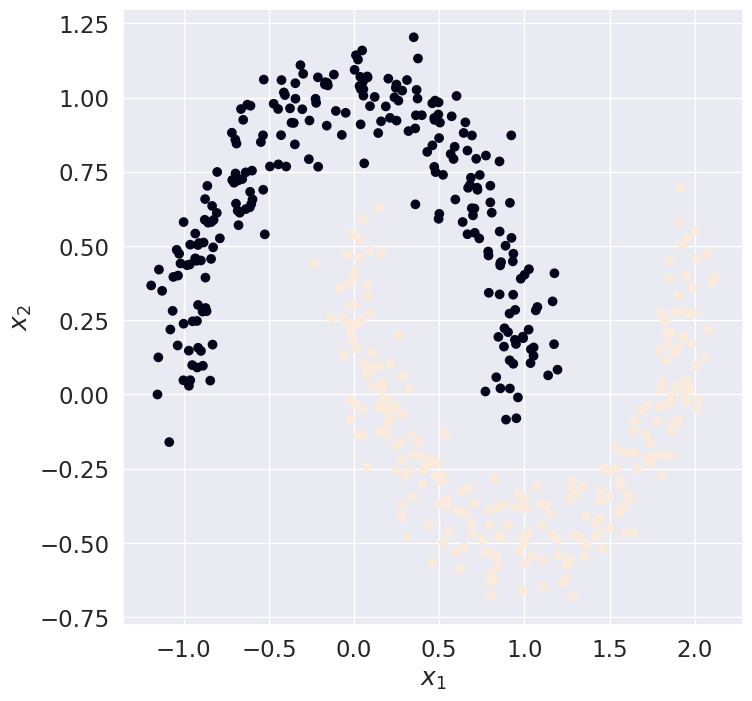

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=y, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Estimated no. of clusters: 1
Estimated no. of noise points: 0
v_measure = 0.0


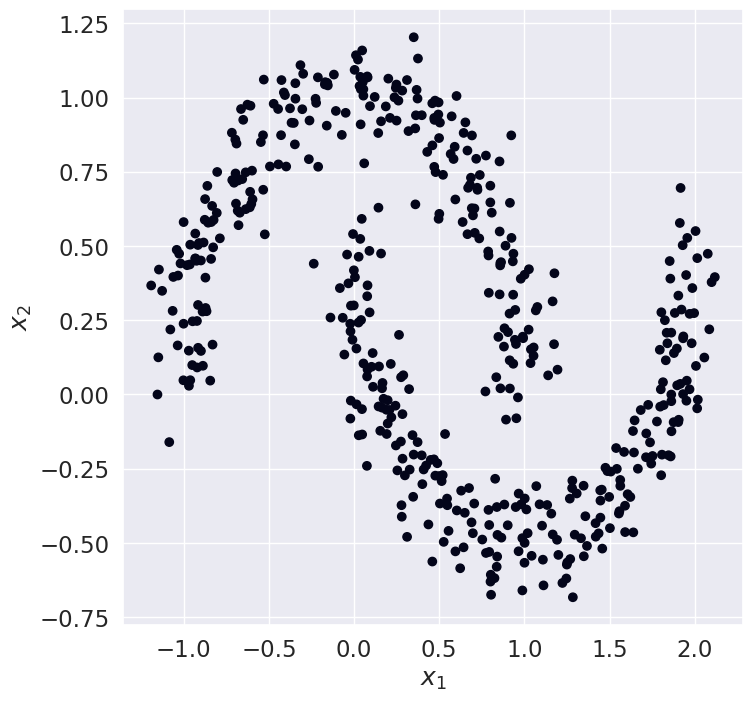

In [38]:
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(X)

# Visualizing DBSCAN
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=dbscan_cluster1.labels_, 
            label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 14
Estimated no. of noise points: 99
v_measure = 0.348591265213712


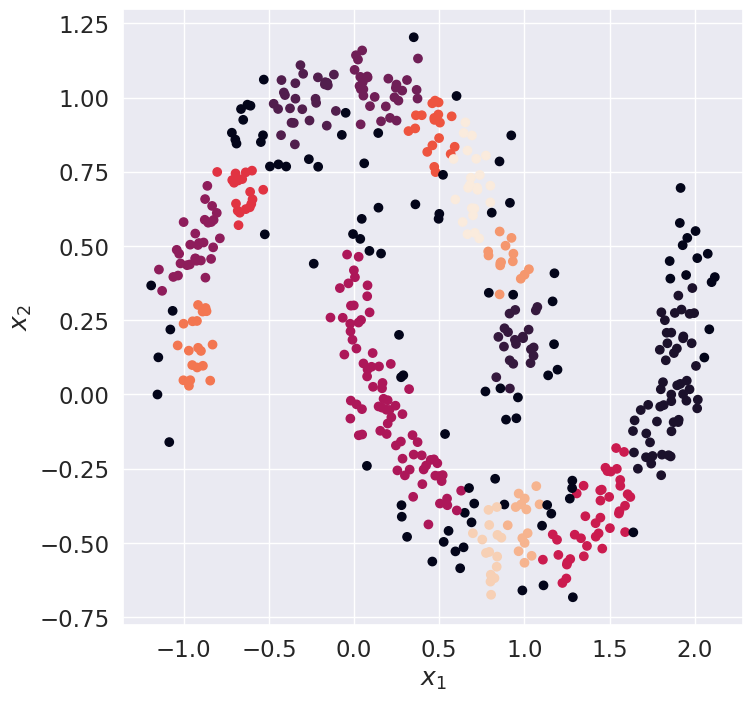

In [39]:
dbscan_cluster = DBSCAN(eps=0.1, min_samples=8)
dbscan_cluster.fit(X)

# Visualizing DBSCAN
plt.scatter(X[:, 0], 
X[:, 1], 
c=dbscan_cluster.labels_, 
label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))